In [28]:
# Importamos pandas para el análisis de datos tabulares
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

#Biblioteca para crear nubes de palabras en Python
from wordcloud import WordCloud 

In [29]:
df_UserReviews=pd.read_csv('user_reviews_cleaned.csv')
df_SteamGames=pd.read_csv('steam_games_cleaned.csv')

In [30]:
# Vemos las estadisticas descriptivas del dataframe
df_UserReviews.describe(include='all')

,item_id,recommend,review,year,sentiment_analysis
count,44401.000000,44401,44401,44401.000000,44401.000000
unique,NaN,2,43181,NaN,NaN
top,NaN,True,great game,NaN,NaN
freq,NaN,38881,216,NaN,NaN
mean,176542.108421,NaN,NaN,2014.250760,1.521970
std,131112.161095,NaN,NaN,0.827757,0.789013
min,10.000000,NaN,NaN,2010.000000,0.000000
25%,20900.000000,NaN,NaN,2014.000000,1.000000
50%,218620.000000,NaN,NaN,2014.000000,2.000000
75%,265630.000000,NaN,NaN,2015.000000,2.000000


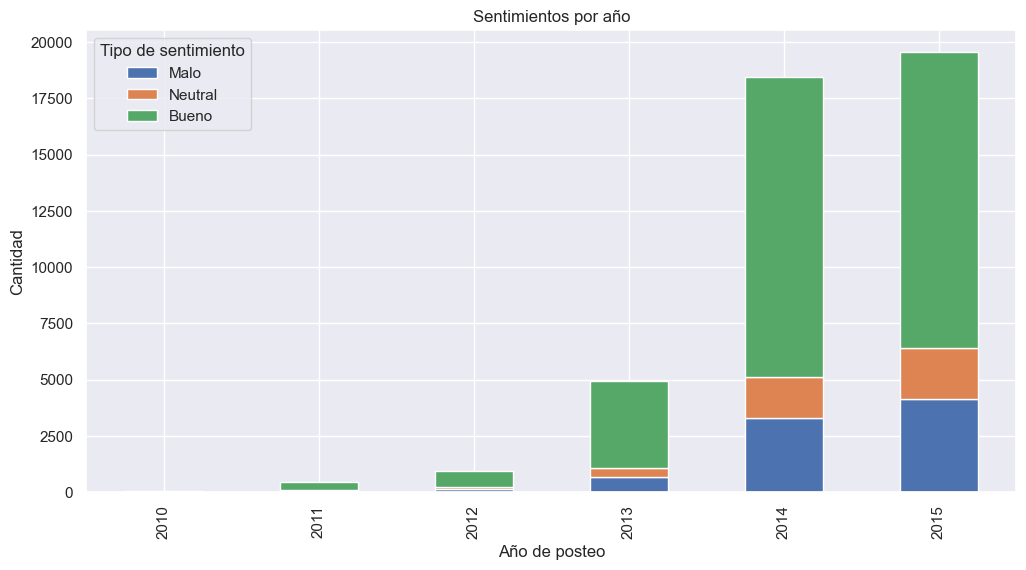

In [31]:
#Se crea un grafico de barras de los sentimientos de los usuarios en cada año
sentimiento_colores = {
    0: ('Malo'),  
    1: ('Neutral'),
    2: ('Bueno') 
}

grouped_data = df_UserReviews.groupby(['year', 'sentiment_analysis']).size().reset_index(name='count')
pivot_data = grouped_data.pivot(index='year', columns='sentiment_analysis', values='count')
sns.set(style='darkgrid')
ax = pivot_data.plot(kind='bar', stacked=True, figsize=(12, 6))

handles, labels = ax.get_legend_handles_labels()
custom_labels = [sentimiento_colores[int(label)] for label in labels]
ax.legend(handles, custom_labels, title='Tipo de sentimiento', loc='upper left')
plt.ylabel('Cantidad')
plt.xlabel('Año de posteo')
plt.title('Sentimientos por año')
plt.show()

Se puede observar en el grafico 'Sentimientos por año',que en el período comprendido entre 2011 y 2015 ha sido testigo de un notable crecimiento en las reseñas de Steam, es esencial destacar que la mayoría de las reseñas durante este lapso son positivas, indicando una experiencia generalmente satisfactoria para la comunidad de usuarios, podría encontrarse debido a lanzamientos de juegos populares, la introducción de títulos destacados y cambios en la interfaz o características de Steam podrían haber contribuido a este crecimiento continuo.



In [32]:
# Se calcula la frecuencia de cada género sumando las columnas
frecuencia_generos = df_SteamGames[['Indie','Action','Casual','Adventure','Strategy','Simulation','RPG','Free to Play','Early Access' ,'Sports']].sum()
df_frecuencia_generos = pd.DataFrame({'Genero': frecuencia_generos.index, 'Frecuencia': frecuencia_generos.values})
df_frecuencia_generos = df_frecuencia_generos.sort_values(by='Frecuencia', ascending=False)

C:\Users\Mati Barna\AppData\Local\Temp\ipykernel_5116\2275579434.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frecuencia', y='Genero', data=df_frecuencia_generos, palette='viridis')


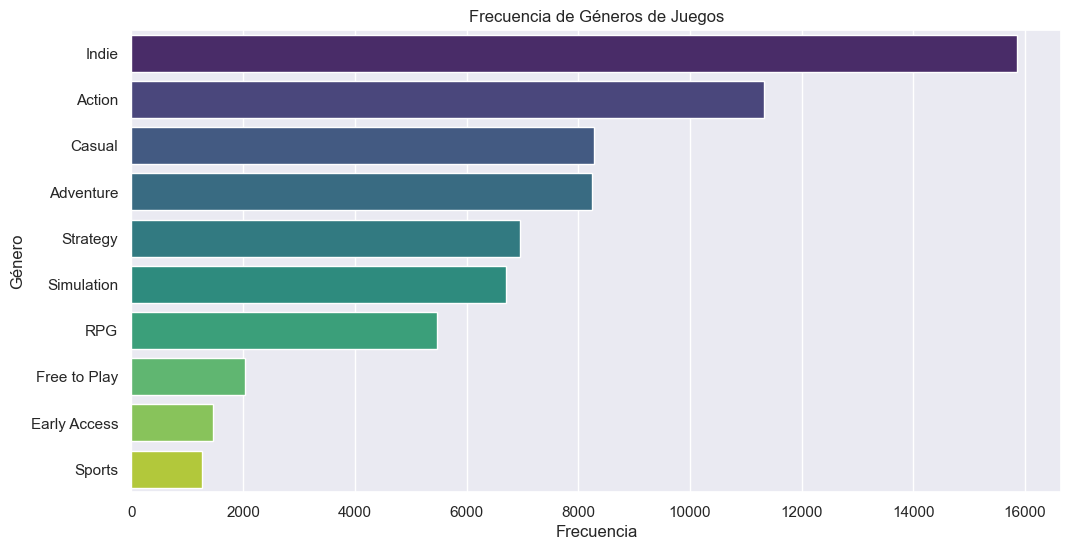

In [33]:
plt.figure(figsize=(12, 6))
# Se crea el gráfico de barras utilizando Seaborn
sns.barplot(x='Frecuencia', y='Genero', data=df_frecuencia_generos, palette='viridis')
plt.xlabel('Frecuencia')
plt.ylabel('Género')
plt.title('Frecuencia de Géneros de Juegos')
plt.show()

Text(0, 0.5, 'Año')

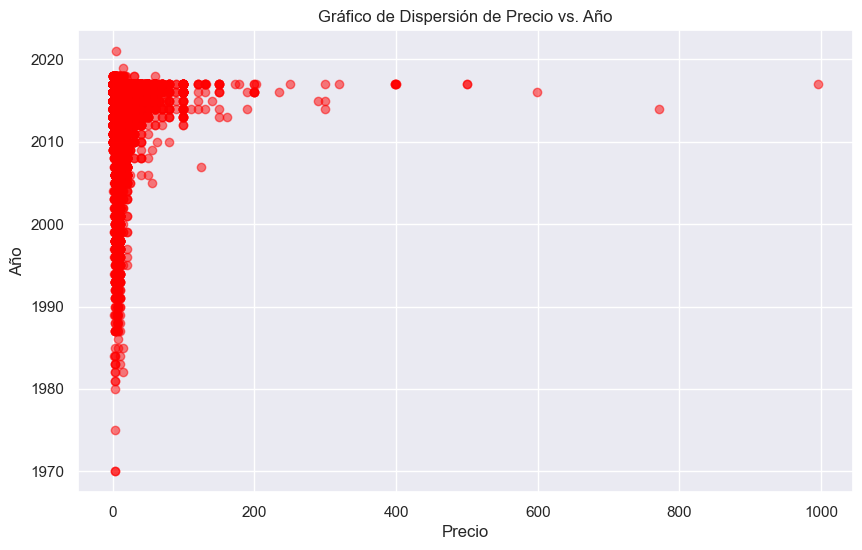

In [37]:
plt.figure(figsize=(10, 6))
# Se crea un scatter plot de year vs. price
plt.scatter(df_SteamGames['price'], df_SteamGames['year'], color='red', alpha=0.5)

# Se personaliza el gráfico con etiquetas y título
plt.title('Gráfico de Dispersión de Precio vs. Año')
plt.xlabel('Precio')
plt.ylabel('Año')

En 'Gráfico de dispercion de precio vs año', vemos entre el 2010 y 2020 un incremento significativo en la cantidad de juegos lanzados, acompañado de una diversidad de precios, precios que en los años anteriores no existian.
La industria del juego ha experimentado una notable evolución en la última década, con un crecimiento tanto en la cantidad como en la diversidad de juegos lanzados.
Tambien justifica el grafico analizado anteriorermente 'Sentimientos por año.

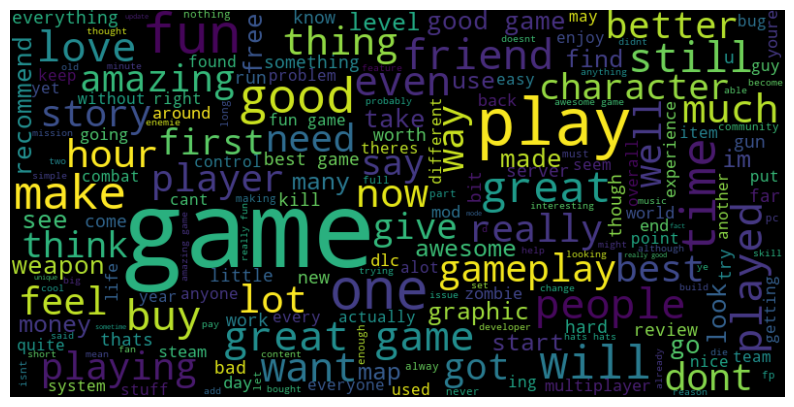

In [39]:

# Concatena todas las reviews en una sola cadena de texto
all_reviews = ' '.join(df_UserReviews['review'].dropna())

# Crea un objeto WordCloud
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(all_reviews)

# Visualiza la nube de palabras
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()